In [93]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from discrete_shocklets import shocklets, kernel_functions
from sklearn.metrics import mean_absolute_error, mean_squared_error


with open("fmri_data.pkl", "rb") as file:
    loaded_list = pickle.load(file)


data = loaded_list
data = data[0] # only first patient - 144, 175, 264
data = data[:140] # take only the training portion of fmri data. Due to benchmark of Delay Embedding and STFT transform
# shape data : 175, 264

data = np.array(data)
print(type(data))

print(data.shape) # 140 time step and 264 features


<class 'numpy.ndarray'>
(140, 264)


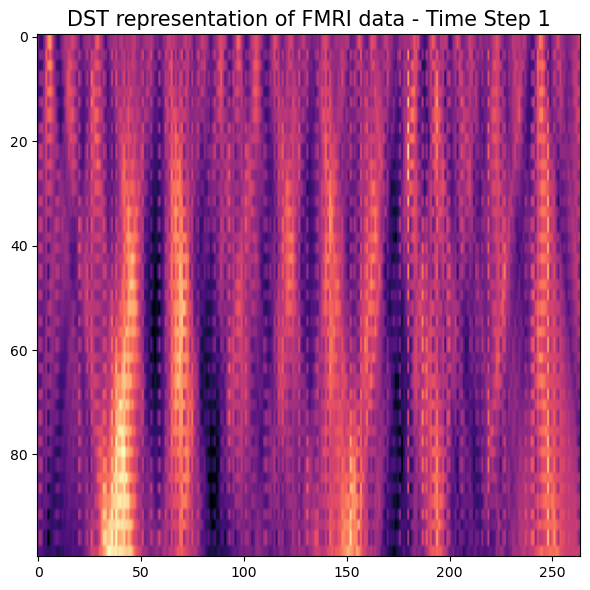

In [94]:
windows = np.linspace(10, 264 / 5, 100).astype(int)
kernel = kernel_functions.power_cusp  # a symmetric power-law type cusp
k_args = [3.]  # arguments for the kernel; in this case, it's the parameter $\theta = 3$.
reflection = 2  # reflect the kernel over the horizontal axis

x = data[0]  # take the first time series

shocklets_obj = shocklets.cusplet(
    x,
    windows,
    kernel_func=kernel,
    kernel_args=k_args,
    reflection=reflection
)

dst,  largest_kernel = shocklets_obj

# fitting the plot
fig, ax1 = plt.subplots(figsize=(6, 6))

im = ax1.imshow(
    dst,
    aspect='auto',
    cmap=plt.cm.magma,
)

# ON patient 0, time step 1
ax1.set_title('DST representation of FMRI data - Time Step 1', fontsize=15)
plt.tight_layout()
plt.savefig('DST_representation_fmri.png')
plt.show()


In [ ]:
# shocklets.cusplet on each time series (row), so each time step will be a shocklet representation with 264 features in it

windows = np.linspace(10, 264 / 5, 100).astype(int)
kernel = kernel_functions.power_cusp  # symmetric power-law type cusp
k_args = [3.]  
reflection = 2  

# empty list to store the DST representations
dst_list = []

# Loop over all 140 time steps in the data
for t in range(data.shape[0]):  # Loop through from row 0 to 139
    x = data[t]  

    # Apply shocklets.cusplet 
    shocklets_obj = shocklets.cusplet(
        x,
        windows,
        kernel_func=kernel,
        kernel_args=k_args,
        reflection=reflection
    )
    
    # Unpack the results
    dst, largest_kernel = shocklets_obj
    
    # Append the DST representation to the list
    dst_list.append(dst)

# Now dst_list contains the DST representations for all 140 time steps
print(f"DST representations computed for {len(dst_list)} time steps.")


DST representations computed for 140 time steps.


In [ ]:
# empty list to store the reconstructed time series
reconstructed_list = []

# Loop over all DST representations in the dst_list
for dst in dst_list:
    # Perform the inverse cusplet transformation
    result = shocklets.inverse_cusplet(
        cc=dst,         
        kernel=kernel,  
        widths=windows,
        k_args=k_args,   
        reflection=reflection  
    )
    

    reconstructed_list.append(result[0]) # only interested in the first element of the result which is the Time Series


print(f"Reconstructed {len(reconstructed_list)} time series from the DST representations.")




Reconstructed 140 time series from the DST representations.


In [89]:
# Reshape the reconstructed time series to the original shape of the data
ts_after_model = np.array(reconstructed_list).reshape(140, 264)



mae = mean_absolute_error(data, ts_after_model)
rmse = np.sqrt(mean_squared_error(data, ts_after_model))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 0.8999777782750988
Root Mean Squared Error: 1.1934897380293135
